In [86]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import log_loss, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc , precision_score , classification_report
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from scipy.stats import stats

Using TensorFlow backend.


In [87]:
df = pd.read_csv('train.csv')
df.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52310 entries, 0 to 52309
Data columns (total 11 columns):
ID                      52310 non-null int64
Agency                  52310 non-null object
Agency Type             52310 non-null object
Distribution Channel    52310 non-null object
Product Name            52310 non-null object
Duration                52310 non-null int64
Destination             52310 non-null object
Net Sales               52310 non-null float64
Commision (in value)    52310 non-null float64
Age                     52310 non-null int64
Claim                   52310 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 4.4+ MB


In [89]:
df.describe()

,ID,Duration,Net Sales,Commision (in value),Age,Claim
count,52310.000000,52310.000000,52310.000000,52310.000000,52310.000000,52310.000000
mean,6005.745804,58.256108,48.554673,12.219963,39.555725,0.166699
std,2306.450475,109.138708,60.198589,22.847645,13.762473,0.372710
min,2000.000000,-2.000000,-389.000000,0.000000,0.000000,0.000000
25%,4015.000000,10.000000,19.800000,0.000000,33.000000,0.000000
50%,6002.000000,24.000000,29.500000,0.000000,36.000000,0.000000
75%,8004.000000,57.000000,55.000000,13.380000,43.000000,0.000000
max,10000.000000,4881.000000,682.000000,262.760000,118.000000,1.000000


# Spliting data into train test and cv

In [3]:
y_true = df.Claim.values
result = df

In [7]:
train_df, test_df,y_train, y_test = train_test_split(result, y_true, stratify = y_true, test_size = 0.2)

In [8]:
print(' Number of data points in train data :' ,train_df.shape[0])
print(' Number of data points in test data :' ,test_df.shape[0])

 Number of data points in train data : 41848
 Number of data points in test data : 10462


# Creating manual weights for xgboost classifier

In [10]:
#https://stackoverflow.com/questions/42192227/xgboost-python-classifier-class-weight-option
from sklearn.utils import class_weight
class_weights = list(class_weight.compute_class_weight({0:'0.2000458820',1:'4.99885321'},np.unique(train_df['Claim']),train_df['Claim']))

w_array = np.ones(y_train.shape[0], dtype = 'float')
for i, val in enumerate(y_train):
    w_array[i] = class_weights[val-1]
w_array

array([4.99885321, 0.20004588, 4.99885321, ..., 0.20004588, 4.99885321,
       4.99885321])

# Distribution of y_i's in Train , Test and Cross Validation datasets

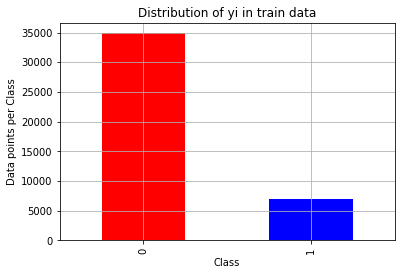

Number of data points in class 0 : 34872 ( 83.33 %)
Number of data points in class 1 : 6976 ( 16.67 %)
--------------------------------------------------------------------------------


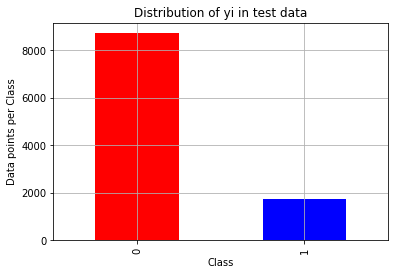

Number of data points in class 0 : 8718 ( 83.33 %)
Number of data points in class 1 : 1744 ( 16.67 %)


In [11]:
train_class_distribution = train_df['Claim'].value_counts().sort_index()
test_class_distribution = test_df['Claim'].value_counts().sort_index()

train_class_distribution.plot(kind = 'bar', color=['r','b'])
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()
for i in range(0,2):
     print('Number of data points in class', i, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/train_df.shape[0]*100), 3), '%)')
print('-'*80)

test_class_distribution.plot(kind = 'bar', color=['r','b'])
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()
for i in range(0,2):
     print('Number of data points in class', i, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/test_df.shape[0]*100), 3), '%)')

# Feature Transformation

1 . Response Coding 

2 . OneHot Encoding

# Response Coding

In [12]:
#Response Coding
def get_fea_dict(alpha, feature, df):

    value_count = train_df[feature].value_counts()
    gv_dict = dict()
    for i, denominator in value_count.items():
        vec = []
        for k in range(0,2):
            cls_cnt = train_df.loc[(train_df['Claim']==k) & (train_df[feature]==i)]
            vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 20*alpha))
        gv_dict[i]=vec
    return gv_dict

def get_gv_feature(alpha, feature, df):
    gv_dict = get_fea_dict(alpha, feature, df)
    value_count = train_df[feature].value_counts()
    
    gv_fea = []
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([1/2,1/2])
    return gv_fea

#### Agency Feature

In [13]:
alpha = 1
train_agency_response_coding = np.array(get_gv_feature(alpha, "Agency", train_df))
test_agency_response_coding = np.array(get_gv_feature(alpha, "Agency", test_df))

In [14]:
Agency_train = pd.DataFrame(train_agency_response_coding, columns=['Agency_1','Agency_2'])
Agency_test = pd.DataFrame(test_agency_response_coding, columns=['Agency_1','Agency_2'])

#### Agency Type Feature

In [15]:
alpha = 1
train_agencyType_response_coding = np.array(get_gv_feature(alpha, "Agency Type", train_df))
test_agencyType_response_coding = np.array(get_gv_feature(alpha, "Agency Type", test_df))


In [16]:
AgencyType_train = pd.DataFrame(train_agencyType_response_coding, columns=['AgencyType_1','AgencyType_2'])
AgencyType_test = pd.DataFrame(test_agencyType_response_coding, columns=['AgencyType_1','AgencyType_2'])

#### Distribution Channel

In [17]:
alpha = 1
train_DisChan_response_coding = np.array(get_gv_feature(alpha, "Distribution Channel", train_df))
test_DisChan_response_coding = np.array(get_gv_feature(alpha, "Distribution Channel", test_df))

In [18]:
DisChan_train = pd.DataFrame(train_DisChan_response_coding, columns=['DisChan_1','DisChan_2'])
DisChan_test = pd.DataFrame(test_DisChan_response_coding, columns=['DisChan_1','DisChan_2'])

#### Product Feature

In [19]:
alpha = 1
train_product_response_coding = np.array(get_gv_feature(alpha, "Product Name", train_df))
test_product_response_coding = np.array(get_gv_feature(alpha, "Product Name", test_df))

In [20]:
product_train = pd.DataFrame(train_product_response_coding, columns=['Product_1','Product_2'])
product_test = pd.DataFrame(test_product_response_coding, columns=['Product_1','Product_2'])


#### Destination

In [21]:
alpha = 1
train_destination_response_coding = np.array(get_gv_feature(alpha, "Destination", train_df))
test_destination_response_coding = np.array(get_gv_feature(alpha, "Destination", test_df))

In [22]:
destination_train = pd.DataFrame(train_destination_response_coding, columns=['Destination_1','Destination_2'])
destination_test = pd.DataFrame(test_destination_response_coding, columns=['Destination_1','Destination_2'])

#### Final DataFrame for Response Coding

In [23]:
dtr = pd.concat([Agency_train,AgencyType_train,DisChan_train,product_train,destination_train],1)
dte = pd.concat([Agency_test,AgencyType_test,DisChan_test,product_test,destination_test],1)

In [24]:
print(train_df.shape)
print(test_df.shape)

(41848, 11)
(10462, 11)


# Standard Scaling of numerical columns

In [25]:
num_train = train_df.iloc[::,[5,7,8,9]]
num_test = test_df.iloc[::,[5,7,8,9]]
cols = list(num_train.columns)
cols

['Duration', 'Net Sales', 'Commision (in value)', 'Age']

In [26]:
scalar = StandardScaler(with_mean=False)
scale_train = pd.DataFrame(scalar.fit_transform(num_train),columns=cols)
scale_test = pd.DataFrame(scalar.transform(num_test),columns=cols)

# Merging dataframes of categorical and numerical = Response Coding

In [27]:
final_train_res = pd.concat([dtr,scale_train],1)
final_test_res = pd.concat([dte,scale_test],1)
print('X')
print(final_train_res.shape)
print(final_test_res.shape)
print('y')
print(y_train.shape)
print(y_test.shape)

X
(41848, 14)
(10462, 14)
y
(41848,)
(10462,)


# ONE HOT ENCODING

In [28]:
new_Xtrain = train_df.iloc[::,[1,2,3,4,6]]
new_Xtest = test_df.iloc[::,[1,2,3,4,6]]
cols = list(new_Xtrain.columns)
cols

['Agency',
 'Agency Type',
 'Distribution Channel',
 'Product Name',
 'Destination']

In [29]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(new_Xtrain)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=True)

In [30]:
new_Xtrain = enc.transform(new_Xtrain).toarray()
new_Xtest = enc.transform(new_Xtest).toarray()
new_Xtrain = pd.DataFrame(new_Xtrain)
new_Xtest = pd.DataFrame(new_Xtest)

# Merging dataframes of categorical and numerical = OHE

In [31]:
final_train_ohe = pd.concat([new_Xtrain,scale_train],1)
final_test_ohe = pd.concat([new_Xtest,scale_test],1)
final_train_ohe

,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,140,Duration,Net Sales,Commision (in value),Age
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.097144,1.647191,2.607130,4.121660
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.017663,0.277053,0.182817,2.892393
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.459228,0.508300,0.335328,3.977040
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.150132,0.658876,1.042852,2.241604
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.008831,0.164719,0.260713,2.241604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.238446,0.715447,0.000000,2.603153
41844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.132470,0.232936,0.000000,2.603153
41845,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.397409,1.601648,1.056285,1.735436
41846,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.114807,0.490830,0.323916,3.904730


# Now we have 2 types of dataframes one with ohe and other with response coding 

In [32]:
print('OHE X_train :', final_train_ohe.shape)
print('OHE X_test :', final_test_ohe.shape)
print('='*70)
print('RES X_train :', final_train_res.shape)
print('RES X_train :', final_test_res.shape)

OHE X_train : (41848, 145)
OHE X_test : (10462, 145)
RES X_train : (41848, 14)
RES X_train : (10462, 14)


# Machine Learning Models

In [36]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
 
    A =(((C.T)/(C.sum(axis=1))).T)

    B =(C/C.sum(axis=0))

    labels = [0,1]
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(5,3))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(5,3))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(5,3))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

# 1 .K Nearest Neighbour Classification with response coding

### 1.1 knn with brute force

In [29]:
def knn_brute_force(Xtrain,ytrain):
    """
    Function to fine the best k neighbors.
    Input : Training data
    ---
    Output : best value of K
    """
    K = [11,15,23,59,101,163]#using odd numbers for K in knn
    neigh = KNeighborsClassifier(algorithm='brute')
    parameters = {'n_neighbors':K}
    clf = GridSearchCV(neigh, parameters, cv=5, scoring='roc_auc',return_train_score=True)
    clf.fit(Xtrain, ytrain)

    train_auc= clf.cv_results_['mean_train_score']
    train_auc_std= clf.cv_results_['std_train_score']
    cv_auc = clf.cv_results_['mean_test_score'] 
    cv_auc_std= clf.cv_results_['std_test_score']
    best_k= clf.best_params_
    best_k = list(best_k.values())[0]

    plt.plot(K, train_auc, label='Train AUC')
    plt.gca().fill_between(K,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')
    
    plt.plot(K, cv_auc, label='CV AUC')
    plt.gca().fill_between(K,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
    plt.scatter(K, train_auc, label='Train AUC points')
    plt.scatter(K, cv_auc, label='CV AUC points')
    plt.grid(True)
    plt.legend()
    plt.xlabel("K: hyperparameter")
    plt.ylabel("AUC")
    plt.title("ERROR PLOTS")
    plt.show()
    return best_k 

def final_knn_brute(Xtrain,ytrain,Xtest,ytest,best_K):
    """
    Function to find the model with best hyperparameter
    Input : Training data, Test Data and best value of k
    ---
    Output : best trained model
    """

    neigh = KNeighborsClassifier(n_neighbors=best_K, algorithm='brute')
    neigh.fit(Xtrain, ytrain)
    train_fpr, train_tpr, thresholds = roc_curve(ytrain, neigh.predict_proba(Xtrain)[:,1])
    test_fpr, test_tpr, thresholds = roc_curve(ytest, neigh.predict_proba(Xtest)[:,1])
    plt.grid(True)
    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.legend()
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.show()
    return neigh

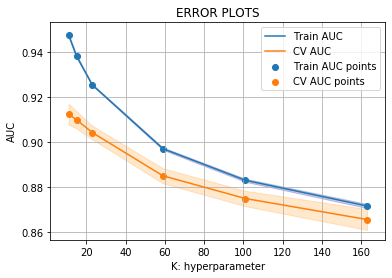

Best K is : 11
Wall time: 17min 47s


In [30]:
%%time
best_K_res = knn_brute_force(final_train_res,y_train)
print('Best K is :', best_K_res)

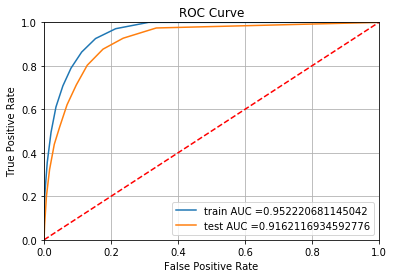

-------------------- Confusion matrix --------------------


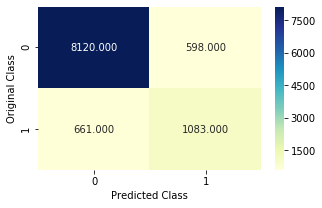

-------------------- Precision matrix (Columm Sum=1) --------------------


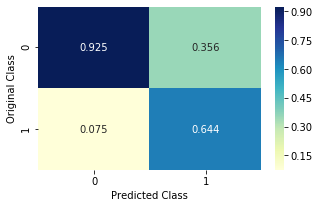

-------------------- Recall matrix (Row sum=1) --------------------


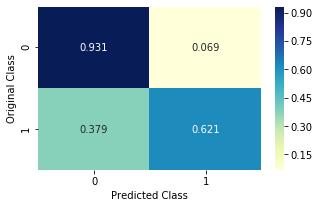

In [31]:
knn_brutemodel_res = final_knn_brute(final_train_res,y_train,final_test_res, y_test,best_K_res)
plot_confusion_matrix(y_test,knn_brutemodel_res.predict(final_test_res))

### 1.2 knn with kd_tree

In [32]:
def knn_kdtree(Xtrain,ytrain):
    """
    Function to fine the best k neighbors.
    Input : Training data
    ---
    Output : best value of K
    """
    K = [11,15,23,59,101,163]#using odd numbers for K in knn
    neigh = KNeighborsClassifier(algorithm='kd_tree')
    parameters = {'n_neighbors':K}
    clf = GridSearchCV(neigh, parameters, cv=5, scoring='roc_auc',return_train_score=True)
    clf.fit(Xtrain, ytrain)

    train_auc= clf.cv_results_['mean_train_score']
    train_auc_std= clf.cv_results_['std_train_score']
    cv_auc = clf.cv_results_['mean_test_score'] 
    cv_auc_std= clf.cv_results_['std_test_score']
    best_k= clf.best_params_
    best_k = list(best_k.values())[0]

    plt.plot(K, train_auc, label='Train AUC')
    plt.gca().fill_between(K,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')
    
    plt.plot(K, cv_auc, label='CV AUC')
    plt.gca().fill_between(K,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
    plt.scatter(K, train_auc, label='Train AUC points')
    plt.scatter(K, cv_auc, label='CV AUC points')
    plt.grid(True)
    plt.legend()
    plt.xlabel("K: hyperparameter")
    plt.ylabel("AUC")
    plt.title("ERROR PLOTS")
    plt.show()
    return best_k 

def final_knn_kdtree(Xtrain,ytrain,Xtest,ytest,best_K):
    """
    Function to find the model with best hyperparameter
    Input : Training data, Test Data and best value of k
    ---
    Output : best trained model
    """

    neigh = KNeighborsClassifier(n_neighbors=best_K, algorithm='kd_tree')
    neigh.fit(Xtrain, ytrain)
    train_fpr, train_tpr, thresholds = roc_curve(ytrain, neigh.predict_proba(Xtrain)[:,1])
    test_fpr, test_tpr, thresholds = roc_curve(ytest, neigh.predict_proba(Xtest)[:,1])
    plt.grid(True)
    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.legend()
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.show()
    return neigh

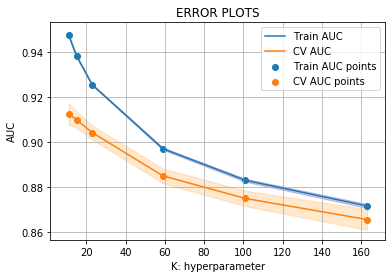

Best K is : 11
Wall time: 1min 40s


In [33]:
%%time
best_K_kdtree_res = knn_kdtree(final_train_res,y_train)
print('Best K is :', best_K_kdtree_res)

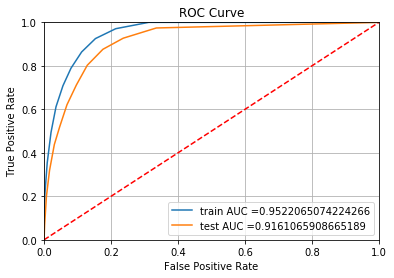

-------------------- Confusion matrix --------------------


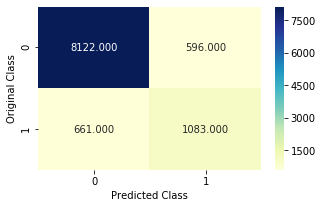

-------------------- Precision matrix (Columm Sum=1) --------------------


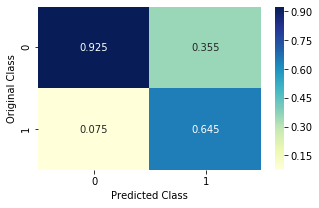

-------------------- Recall matrix (Row sum=1) --------------------


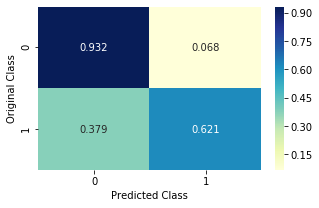

In [34]:
knn_kdtree_res = final_knn_kdtree(final_train_res,y_train,final_test_res, y_test,best_K_kdtree_res)
plot_confusion_matrix(y_test,knn_kdtree_res.predict(final_test_res))

# 2 .K Nearest Neighbour Classification with OHE

### 2.1 knn with brute force

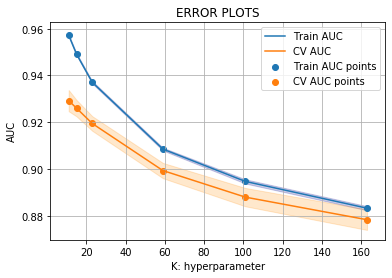

Best K is : 11
Wall time: 18min 50s


In [35]:
%%time
best_K_ohe = knn_brute_force(final_train_ohe,y_train)
print('Best K is :', best_K_ohe)

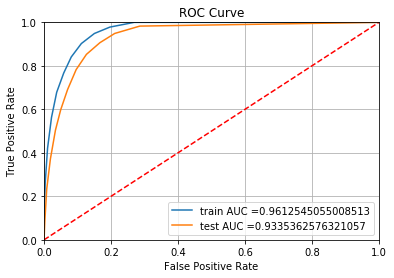

-------------------- Confusion matrix --------------------


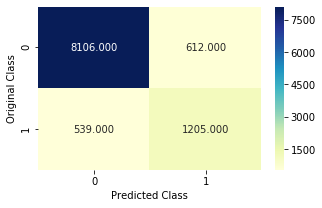

-------------------- Precision matrix (Columm Sum=1) --------------------


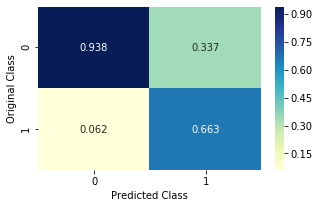

-------------------- Recall matrix (Row sum=1) --------------------


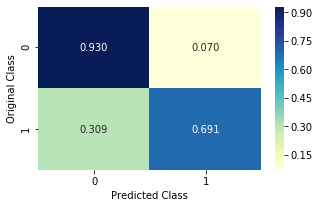

In [36]:
knn_brutemodel_ohe = final_knn_kdtree(final_train_ohe,y_train,final_test_ohe, y_test,best_K_ohe)
plot_confusion_matrix(y_test,knn_brutemodel_ohe.predict(final_test_ohe))

### 2.2 knn with kdtree

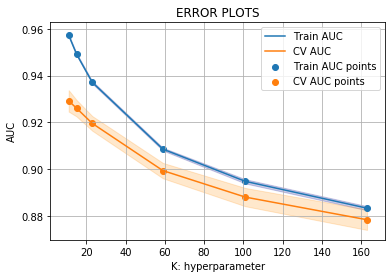

Best K is : 11
Wall time: 29min 49s


In [37]:
%%time
best_K_kdtree_ohe = knn_kdtree(final_train_ohe,y_train)
print('Best K is :', best_K_kdtree_ohe)

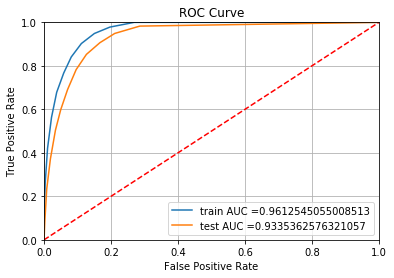

-------------------- Confusion matrix --------------------


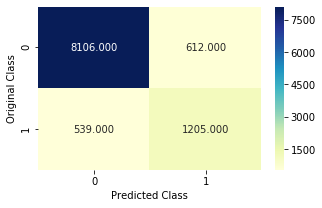

-------------------- Precision matrix (Columm Sum=1) --------------------


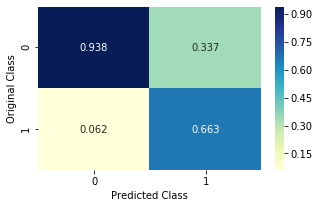

-------------------- Recall matrix (Row sum=1) --------------------


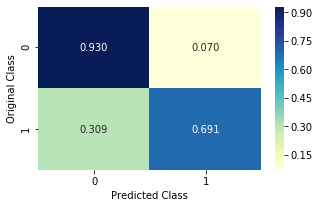

In [38]:
knn_kdtree_ohe = final_knn_kdtree(final_train_ohe,y_train,final_test_ohe, y_test,best_K_kdtree_ohe)
plot_confusion_matrix(y_test,knn_kdtree_ohe.predict(final_test_ohe))

# 3 . Logistic Regression

# 3.1 Logistic Regression with response coding

In [39]:
def logit(Xtrain,ytrain):
    """
    Function to find the best hyperparameter
    Input : Training Dataset
    ---
    Output : best hyperparameter
    """
    parameters = [{'C': [10**x for x in range(-4,5)]}]
    K =[10**x for x in range(-4,5)]
    K = np.log10(K)
    
    log= LogisticRegression(class_weight = 'balanced')
    clf = GridSearchCV(log, parameters, cv=5, scoring='roc_auc',return_train_score=True)
    clf.fit(Xtrain, ytrain)

    train_auc= clf.cv_results_['mean_train_score']
    train_auc_std= clf.cv_results_['std_train_score']
    cv_auc = clf.cv_results_['mean_test_score'] 
    cv_auc_std= clf.cv_results_['std_test_score']
    lamb= clf.best_params_
    lamb = list(lamb.values())[0]

    plt.plot(K, train_auc, label='Train AUC')
    # this code is copied from here: https://stackoverflow.com/a/48803361/4084039
    plt.gca().fill_between(K,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')
    
    plt.plot(K, cv_auc, label='CV AUC')
    plt.gca().fill_between(K,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
    plt.scatter(K, train_auc, label='Train AUC points')
    plt.scatter(K, cv_auc, label='CV AUC points')
    plt.grid(True)
    plt.legend()
    plt.xlabel("K: hyperparameter")
    plt.ylabel("AUC")
    plt.title("ERROR PLOTS")
    plt.show()
    return lamb

def final_logl2(Xtrain,ytrain,Xtest,ytest,best_c):
    """
    Function to find the model with best hyperparameter
    Input : Training data, Test Data and best value of c
    ---
    Output : best trained model
    """
    logl2 = LogisticRegression(C= best_c,class_weight = 'balanced')
    logl2.fit(Xtrain, ytrain)
    train_fpr, train_tpr, thresholds = roc_curve(ytrain, logl2.predict_proba(Xtrain)[:,1])
    test_fpr, test_tpr, thresholds = roc_curve(ytest, logl2.predict_proba(Xtest)[:,1])
    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.legend()
    plt.grid(True)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.show()
    return logl2

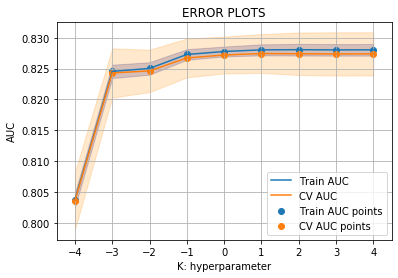

best c using L2 : 10
Wall time: 9.45 s


In [40]:
%%time
best_c_res = logit(final_train_res,y_train)
print('best c using L2 :',best_c_res)

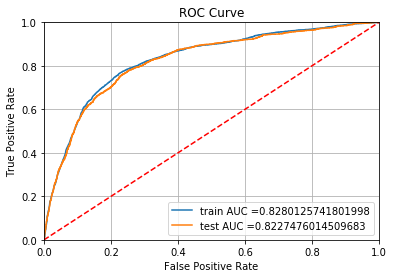

-------------------- Confusion matrix --------------------


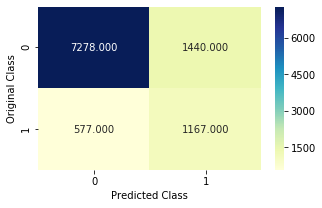

-------------------- Precision matrix (Columm Sum=1) --------------------


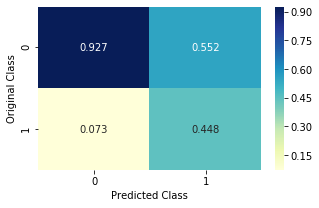

-------------------- Recall matrix (Row sum=1) --------------------


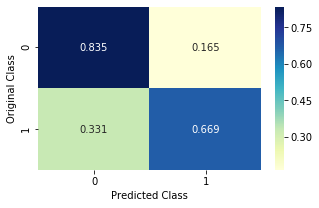

In [41]:
log_model_res= final_logl2(final_train_res,y_train,final_test_res, y_test,best_c_res)
plot_confusion_matrix(y_test,log_model_res.predict(final_test_res))

### 3. 2 Logistic Regression with OHE

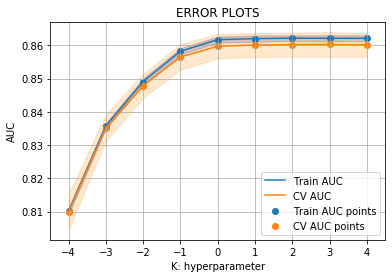

best c using L2 : 1000
Wall time: 34.5 s


In [42]:
%%time
best_c_ohe = logit(final_train_ohe,y_train)
print('best c using L2 :',best_c_ohe)

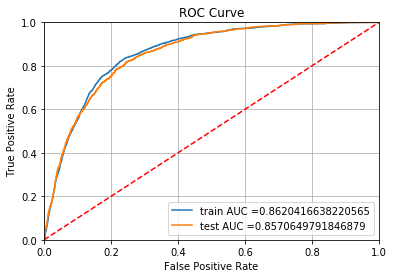

-------------------- Confusion matrix --------------------


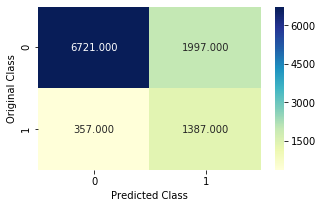

-------------------- Precision matrix (Columm Sum=1) --------------------


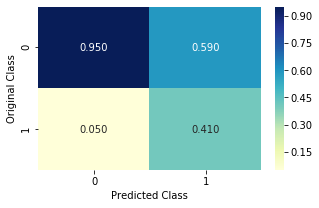

-------------------- Recall matrix (Row sum=1) --------------------


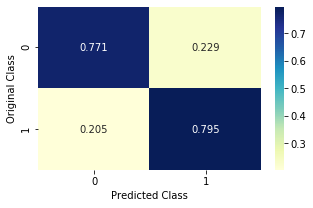

In [43]:
log_model_ohe= final_logl2(final_train_ohe,y_train,final_test_ohe, y_test,best_c_ohe)
plot_confusion_matrix(y_test,log_model_ohe.predict(final_test_ohe))

# 3 .Decision Tree

# 3 .1 Decision Tree with response coding

In [44]:
def dtc(Xtrain,ytrain):
    """
    Function to find the best hyperparameter 
    Returns : best parameters of DecisionTree Calssifier
    ---
    Input : Dataset
    """
    max_depth = [110,160,210,300]
    min_samples_split = [2,4,10,50,80]
    parameters = {'max_depth': max_depth, 'min_samples_split' :min_samples_split}
    clftree = DecisionTreeClassifier()
    clf = GridSearchCV(clftree,parameters,cv=5, scoring='roc_auc',return_train_score=True)
    clf.fit(Xtrain,ytrain)
    tab = pd.DataFrame(clf.cv_results_)
    import seaborn as sns
    plt.figure(figsize=(15, 8))
    max_scores = tab.groupby(['param_max_depth','param_min_samples_split']).max()
    max_scores = max_scores.unstack()[['mean_test_score', 'mean_train_score']]
    sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g')
    plt.title('Grid Search CV Score on Train and Test Data')
    plt.show()
    best_parameter= clf.best_params_
    print('Best depth: ', clf.best_estimator_.max_depth)
    print('Best samples split: ', clf.best_estimator_.min_samples_split)
    return clf.best_estimator_.max_depth, clf.best_estimator_.min_samples_split

def final_tree( Xtrain ,ytrain ,Xtest ,ytest , param1 , param2):
    """
    Returns : Model
    ---
    Input : Train dataset, Test Dataset , best parameters
    """
    from sklearn.metrics import roc_curve, auc
    import matplotlib.pyplot as plt
    from sklearn.tree import DecisionTreeClassifier

    clftre = DecisionTreeClassifier(class_weight='balanced',min_samples_split=param1, max_depth=param2)
    clftre.fit(Xtrain,ytrain)
    train_fpr, train_tpr, thresholds = roc_curve(y_train, clftre.predict_proba(Xtrain)[:,1])
    test_fpr, test_tpr, thresholds = roc_curve(y_test, clftre.predict_proba(Xtest)[:,1])
    
    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.legend()
    plt.grid(True)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.show()
    return  clftre

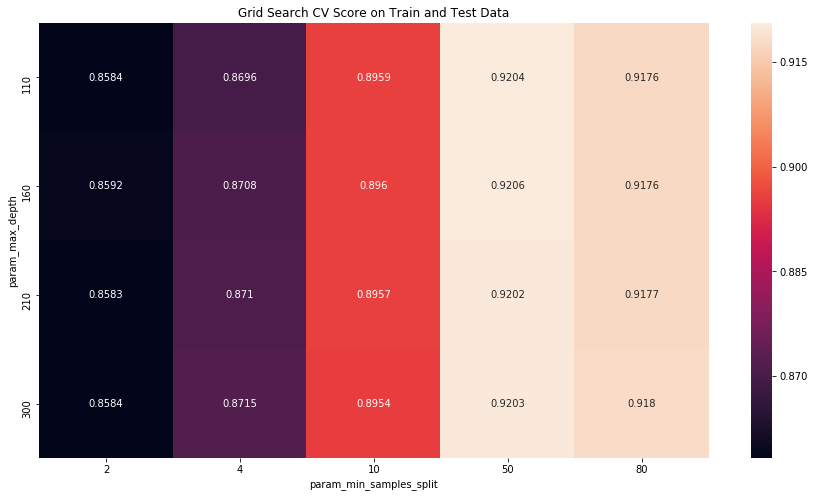

Best depth:  160
Best samples split:  50
Wall time: 14.2 s


In [45]:
%%time
best_depth_dt_res, best_samle_split_dt_res = dtc(final_train_res,y_train)

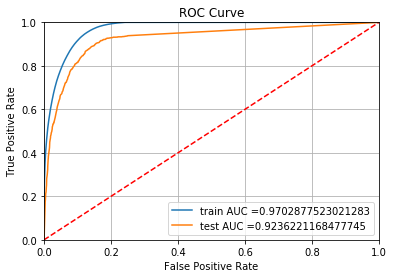

-------------------- Confusion matrix --------------------


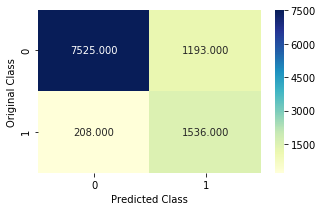

-------------------- Precision matrix (Columm Sum=1) --------------------


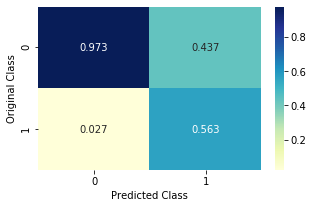

-------------------- Recall matrix (Row sum=1) --------------------


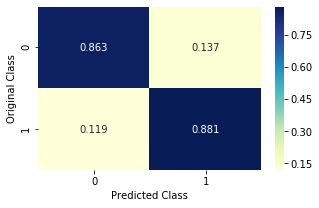

In [46]:
dt_res= final_tree(final_train_res,y_train, final_test_res, y_test,best_samle_split_dt_res,best_depth_dt_res)
plot_confusion_matrix(y_test,dt_res.predict(final_test_res))

# 4 .2 Decision Tree with OHE

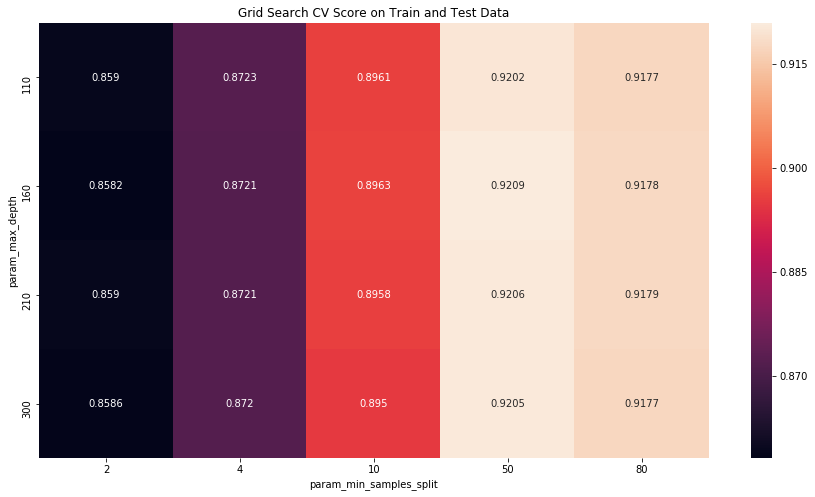

Best depth:  160
Best samples split:  50
Wall time: 14.2 s


In [47]:
%%time
best_depth_dt_ohe, best_samle_split_dt_ohe = dtc(final_train_res,y_train)

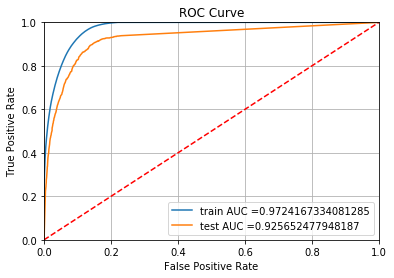

-------------------- Confusion matrix --------------------


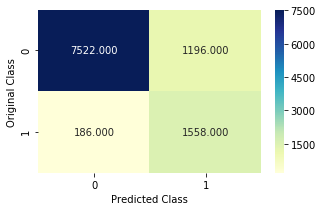

-------------------- Precision matrix (Columm Sum=1) --------------------


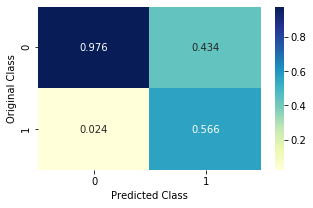

-------------------- Recall matrix (Row sum=1) --------------------


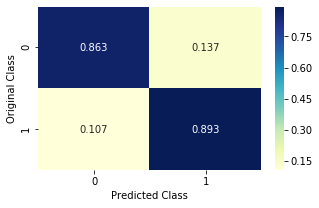

In [48]:
dt_ohe= final_tree(final_train_ohe,y_train, final_test_ohe, y_test,best_samle_split_dt_ohe,best_depth_dt_ohe)
plot_confusion_matrix(y_test,dt_ohe.predict(final_test_ohe))

# 5 Rndom Forest

# 5.1 Random Forest with res

In [63]:
def best_RF(Xtrain,ytrain):
    """
    Function to find the best hyperparameter of random forest
    Returns : best depth and best number of models
    ---
    Input : Training dataset
    """
    # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
    max_depth = [130,170,190,210,220,250]
    n_models = [70,80,90,110,150,190]
    parameters = {'max_depth':  max_depth, 'n_estimators' :n_models}
    clftree = RandomForestClassifier(class_weight='balanced')
    clf = GridSearchCV(clftree,parameters,cv=5, scoring='roc_auc',return_train_score=True)
    clf.fit(Xtrain,ytrain)
    tab = pd.DataFrame(clf.cv_results_)
    import seaborn as sns
    plt.figure(figsize=(15, 8))
    max_scores = tab.groupby(['param_max_depth','param_n_estimators']).max()
    max_scores = max_scores.unstack()[['mean_test_score', 'mean_train_score']]
    sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g')
    plt.title('Grid Search CV Score on Train and Test Data')
    plt.show()
    best_parameter= clf.best_params_
    print('Best depth: ', clf.best_estimator_.max_depth)
    print('Best n estimators: ', clf.best_estimator_.n_estimators)
    return clf.best_estimator_.max_depth, clf.best_estimator_.n_estimators

def final_RF( Xtrain ,ytrain ,Xtest ,ytest , param1 , param2):
    """
    Returns : threshold values, False positive rate , True positive rate and the trained model
    ---
    Input : Train dataset, Test Dataset , best parameters
    """
    clftre = RandomForestClassifier(class_weight='balanced',n_estimators=param1, max_depth=param2,criterion='entropy',min_samples_leaf=3)
    clftre.fit(Xtrain,ytrain)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    train_fpr, train_tpr, thresholds = roc_curve(ytrain, clftre.predict_proba(Xtrain)[:,1])
    test_fpr, test_tpr, thresholds = roc_curve(ytest, clftre.predict_proba(Xtest)[:,1])
    
    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.legend()
    plt.grid(True)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.show()
    return  clftre

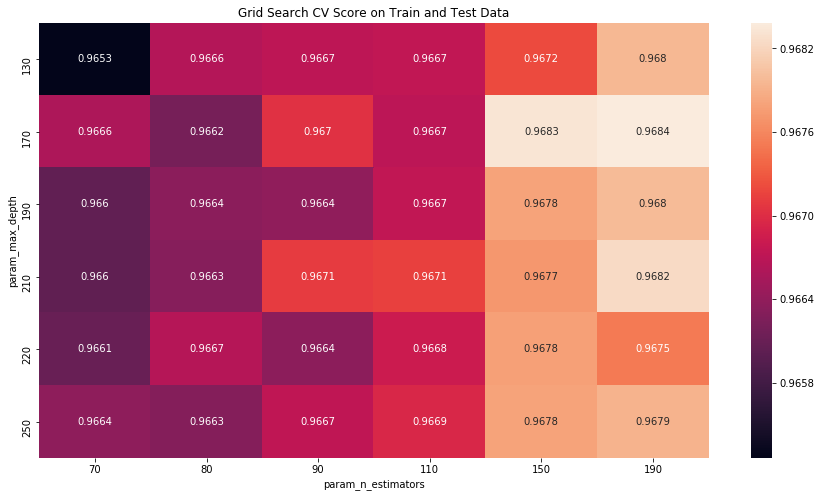

Best depth:  170
Best n estimators:  190
Wall time: 11min 26s


In [50]:
%%time
best_depth_rf_res, best_samle_split_rf_res = best_RF(final_train_res,y_train)

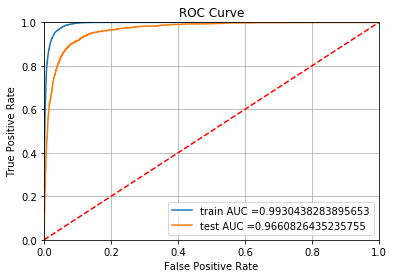

-------------------- Confusion matrix --------------------


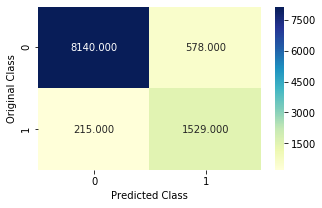

-------------------- Precision matrix (Columm Sum=1) --------------------


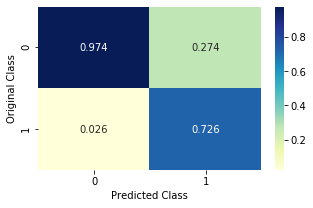

-------------------- Recall matrix (Row sum=1) --------------------


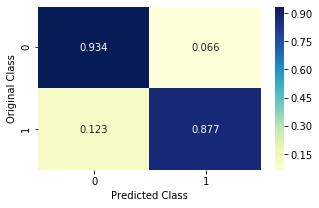

In [51]:
rf_res= final_RF(final_train_res,y_train, final_test_res, y_test,best_samle_split_rf_res,best_depth_rf_res)
plot_confusion_matrix(y_test,rf_res.predict(final_test_res))

# 5.2 Random Forest with OHE

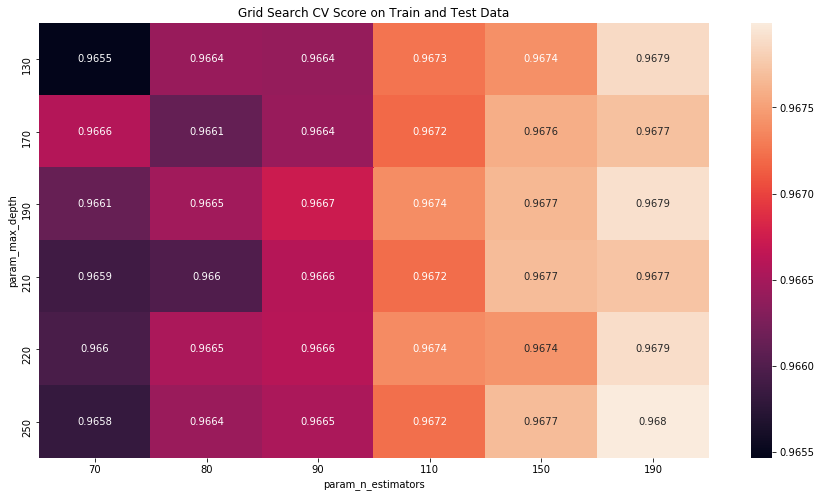

Best depth:  250
Best n estimators:  190
Wall time: 24min 20s


In [52]:
%%time
best_depth_rf_ohe, best_samle_split_rf_ohe = best_RF(final_train_ohe,y_train)

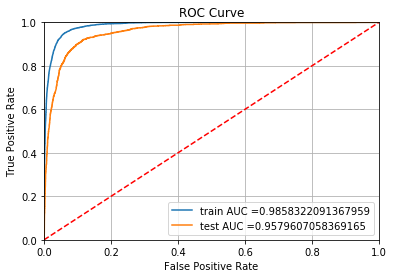

-------------------- Confusion matrix --------------------


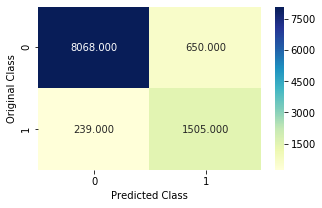

-------------------- Precision matrix (Columm Sum=1) --------------------


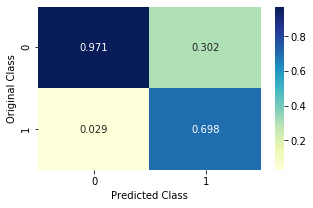

-------------------- Recall matrix (Row sum=1) --------------------


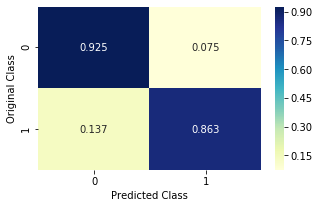

In [89]:
rf_ohe= final_RF(final_train_ohe,y_train, final_test_ohe, y_test,200,250)
plot_confusion_matrix(y_test,rf_ohe.predict(final_test_ohe))

# 6. GBDT using Xgboost

# 6.1 GBDT with response coding

In [54]:
def best_GBDT(Xtrain,ytrain):
    """
    Input : Training Data
    ---
    Output :Best parameters
    """
    max_depth = [120,130,140,150,190,200]
    n_models = [90,100,140,130,200]
    parameters = {'max_depth': max_depth, 'n_estimators' :n_models}
    clftree = XGBClassifier(booster='gbtree')
    clf = GridSearchCV(clftree,parameters,cv=3, scoring='roc_auc',return_train_score=True)
    clf.fit(Xtrain,y_train)
    tab = pd.DataFrame(clf.cv_results_)
    import seaborn as sns
    plt.figure(figsize=(15, 8))
    max_scores = tab.groupby(['param_max_depth','param_n_estimators']).max()
    max_scores = max_scores.unstack()[['mean_test_score', 'mean_train_score']]
    sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g')
    plt.title('Grid Search CV Score on Train and Test Data')
    plt.show()
    best_parameter= clf.best_params_
    print('Best depth: ', clf.best_estimator_.max_depth)
    print('Best n estimators: ', clf.best_estimator_.n_estimators)
    return clf.best_estimator_.max_depth, clf.best_estimator_.n_estimators

def final_GBDT( Xtrain ,ytrain ,Xtest ,ytest , param1 , param2):
    """
    Returns : threshold values, False positive rate , True positive rate and the trained model
    ---
    Input : Train dataset, Test Dataset , best parameters
    """
    from sklearn.metrics import roc_curve, auc
    import matplotlib.pyplot as plt
    from xgboost import XGBClassifier
    clftre = XGBClassifier(booster='gbtree', n_estimators=param1 , max_depth=param2)
    clftre.fit(Xtrain,ytrain)
    train_fpr, train_tpr, thresholds = roc_curve(ytrain, clftre.predict_proba(Xtrain)[:,1])
    test_fpr, test_tpr, thresholds = roc_curve(ytest, clftre.predict_proba(Xtest)[:,1])
    
    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.legend()
    plt.grid(True)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.show()
    return clftre

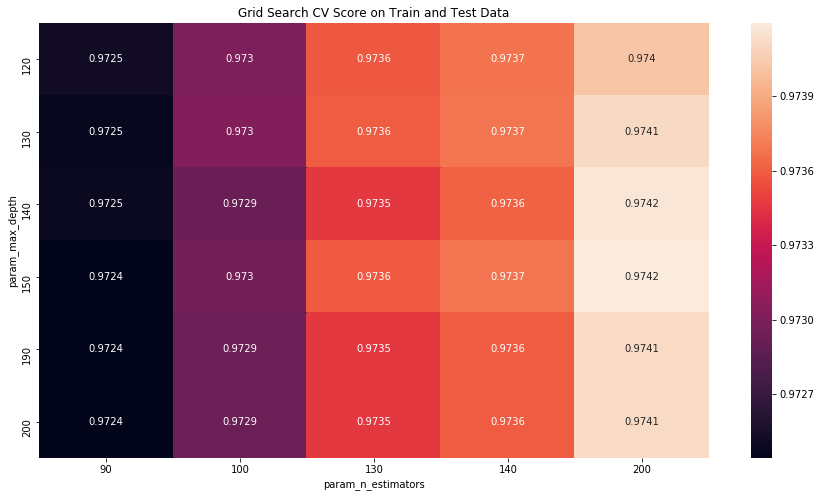

Best depth:  150
Best n estimators:  200
Wall time: 32min 25s


In [55]:
%%time
best_depth_res_xg , n_models_res_xg = best_GBDT(final_train_res,y_train)

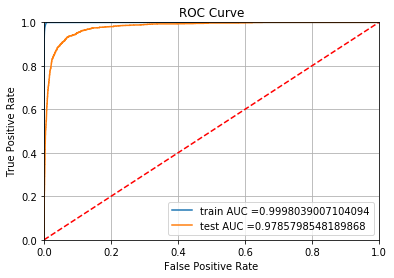

-------------------- Confusion matrix --------------------


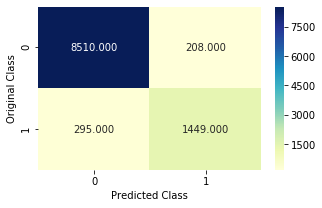

-------------------- Precision matrix (Columm Sum=1) --------------------


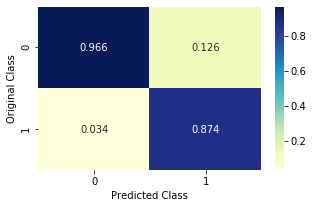

-------------------- Recall matrix (Row sum=1) --------------------


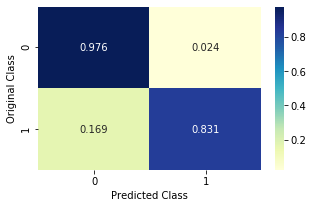

In [56]:
xg_res= final_GBDT(final_train_res,y_train, final_test_res, y_test,n_models_res_xg,best_depth_res_xg)
plot_confusion_matrix(y_test,xg_res.predict(final_test_res))

# 6.2 GBDT with OHE

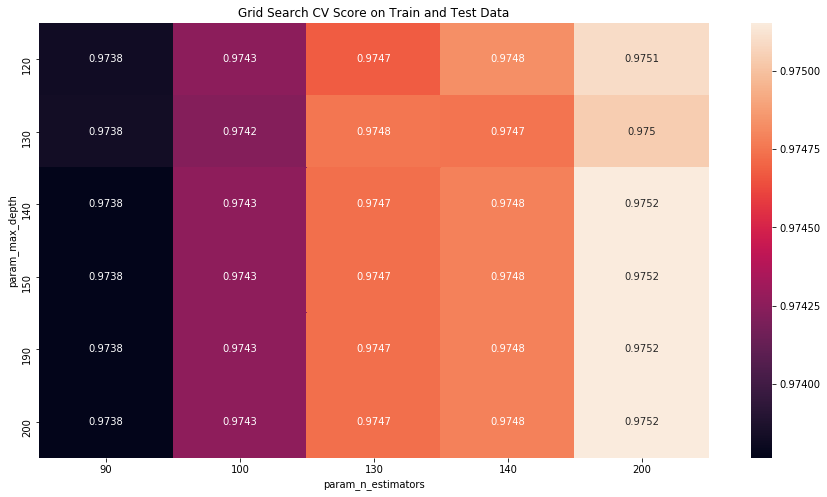

Best depth:  150
Best n estimators:  200
Wall time: 3h 54min 30s


In [57]:
%%time
best_depth_xg_ohe, best_samle_split_xg_ohe = best_GBDT(final_train_ohe,y_train)

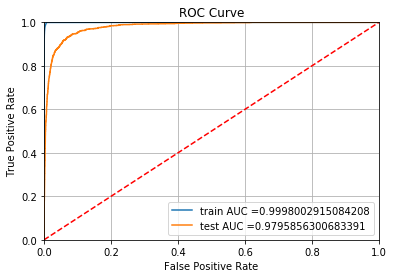

-------------------- Confusion matrix --------------------


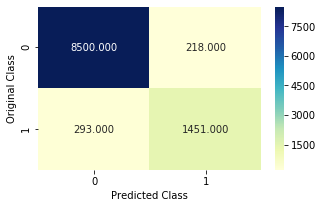

-------------------- Precision matrix (Columm Sum=1) --------------------


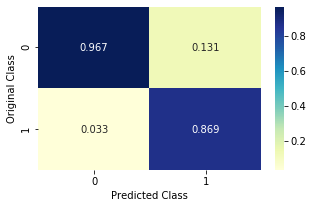

-------------------- Recall matrix (Row sum=1) --------------------


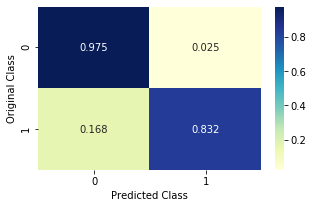

In [58]:
xg_ohe= final_GBDT(final_train_ohe,y_train, final_test_ohe, y_test,best_samle_split_xg_ohe,best_depth_xg_ohe)
plot_confusion_matrix(y_test,xg_ohe.predict(final_test_ohe))

# 7. AdaBoost

# 7.1 Adaboost with response coding

In [74]:
def best_ADA(Xtrain,ytrain):
    """
    Input : Training Data
    ---
    Output :Best parameters
    """
    learning = [1]
    n_models = [400,450,500]
    parameters = {'learning_rate': learning, 'n_estimators' :n_models}
    clftree = AdaBoostClassifier()
    clf = GridSearchCV(clftree,parameters,cv=3, scoring='roc_auc',return_train_score=True)
    clf.fit(final_train_res,y_train)
    tab = pd.DataFrame(clf.cv_results_)
    plt.figure(figsize=(15, 8))
    max_scores = tab.groupby(['param_learning_rate','param_n_estimators']).max()
    max_scores = max_scores.unstack()[['mean_test_score', 'mean_train_score']]
    sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g')
    plt.title('Grid Search CV Score on Train and Test Data')
    plt.show()
    best_parameter= clf.best_params_
    print('Best learning rate: ', clf.best_estimator_.learning_rate)
    print('Best n estimators: ', clf.best_estimator_.n_estimators)
    return clf.best_estimator_.learning_rate, clf.best_estimator_.n_estimators

def final_ADA( Xtrain ,ytrain ,Xtest ,ytest , param1 , param2):
    """
    Returns : threshold values, False positive rate , True positive rate and the trained model
    ---
    Input : Train dataset, Test Dataset , best parameters
    """
    clftre = AdaBoostClassifier(n_estimators=param1 , learning_rate=param2)
    clftre.fit(Xtrain,ytrain)
    train_fpr, train_tpr, thresholds = roc_curve(ytrain, clftre.predict_proba(Xtrain)[:,1])
    test_fpr, test_tpr, thresholds = roc_curve(ytest, clftre.predict_proba(Xtest)[:,1])
    
    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.legend()
    plt.grid(True)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.show()
    return clftre

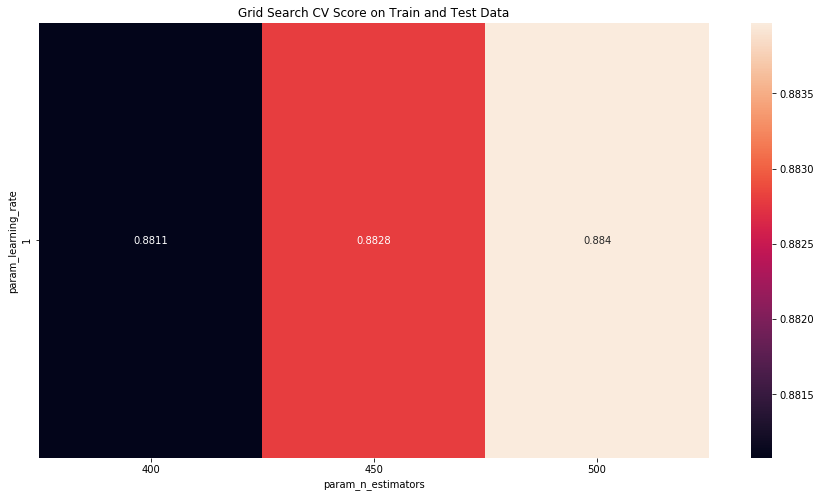

Best learning rate:  1
Best n estimators:  500
Wall time: 1min 53s


In [75]:
%%time
best_lrate, best_nmodels_ada = best_ADA(final_train_res,y_train)

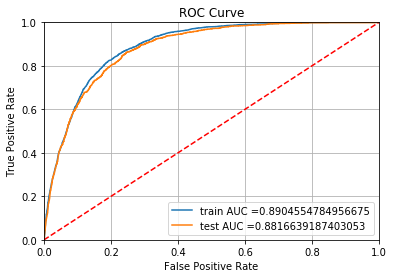

-------------------- Confusion matrix --------------------


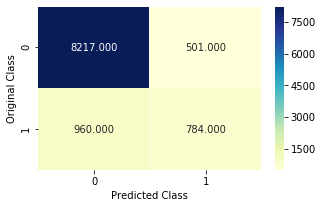

-------------------- Precision matrix (Columm Sum=1) --------------------


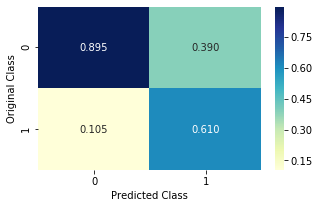

-------------------- Recall matrix (Row sum=1) --------------------


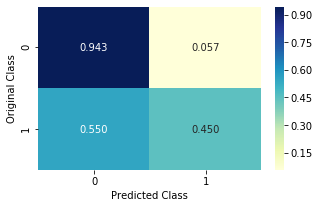

In [76]:
ada_res= final_ADA(final_train_res,y_train, final_test_res, y_test,best_nmodels_ada, best_lrate)
plot_confusion_matrix(y_test,ada_res.predict(final_test_res))

# 7.2 Adaboost with ohe

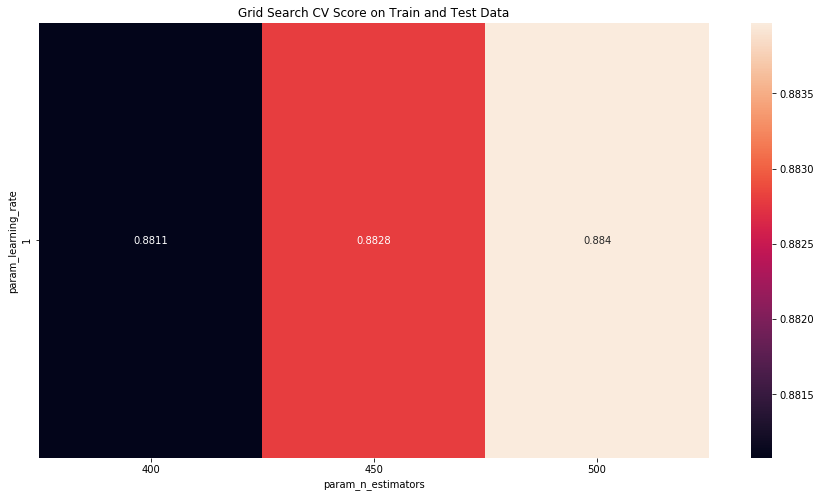

Best learning rate:  1
Best n estimators:  500
Wall time: 1min 46s


In [77]:
%%time
best_lrate_ohe, best_nmodels_ada_ohe = best_ADA(final_train_ohe,y_train)

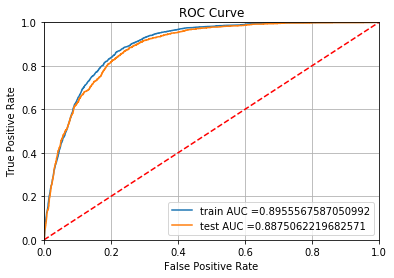

-------------------- Confusion matrix --------------------


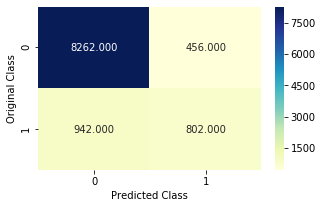

-------------------- Precision matrix (Columm Sum=1) --------------------


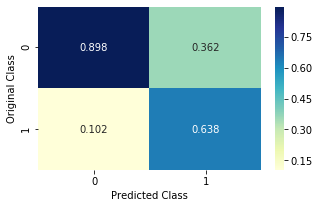

-------------------- Recall matrix (Row sum=1) --------------------


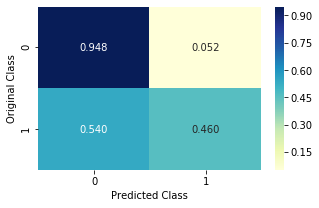

In [78]:
ada_ohe= final_ADA(final_train_ohe,y_train, final_test_ohe, y_test,best_nmodels_ada_ohe, best_lrate_ohe)
plot_confusion_matrix(y_test,ada_ohe.predict(final_test_ohe))

# 8 .Stacking all models

#### 8.1 with response coding

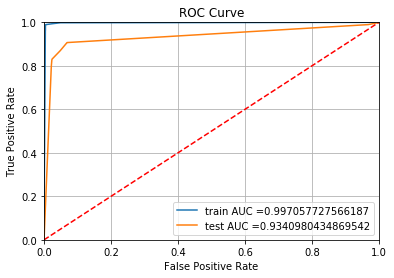

Wall time: 3min 2s


In [86]:
%%time
from mlxtend.classifier import StackingClassifier
m_classifier=LogisticRegression(random_state=0)

# Code starts here
sclf = StackingClassifier(classifiers = [knn_brutemodel_res,knn_kdtree_res,rf_res,xg_res], meta_classifier=m_classifier)
sclf.fit(final_train_res,y_train)
train_fpr, train_tpr, thresholds = roc_curve(y_train, sclf.predict_proba(final_train_res)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, sclf.predict_proba(final_test_res)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.grid(True)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

-------------------- Confusion matrix --------------------


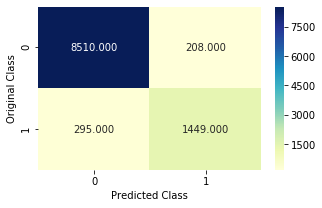

-------------------- Precision matrix (Columm Sum=1) --------------------


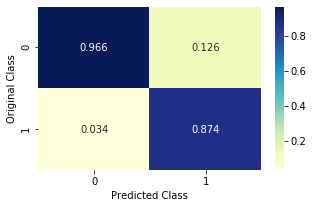

-------------------- Recall matrix (Row sum=1) --------------------


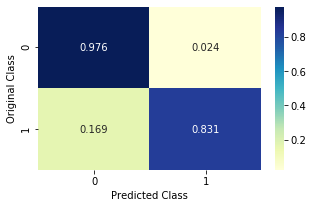

In [87]:
plot_confusion_matrix(y_test,sclf.predict(final_test_res))

### 8.2 with ohe

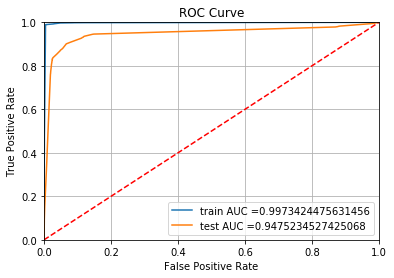

Wall time: 13min 42s


In [90]:
%%time
from mlxtend.classifier import StackingClassifier
m_classifier=LogisticRegression(random_state=0)

# Code starts here
sclf_ohe = StackingClassifier(classifiers = [knn_brutemodel_ohe,knn_kdtree_ohe,log_model_ohe,dt_ohe,rf_ohe,xg_ohe,ada_ohe], meta_classifier=m_classifier)
sclf_ohe.fit(final_train_ohe,y_train)
train_fpr, train_tpr, thresholds = roc_curve(y_train, sclf_ohe.predict_proba(final_train_ohe)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, sclf_ohe.predict_proba(final_test_ohe)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.grid(True)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

-------------------- Confusion matrix --------------------


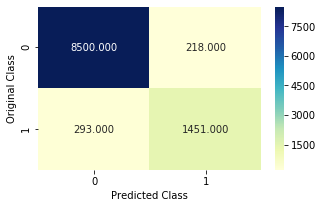

-------------------- Precision matrix (Columm Sum=1) --------------------


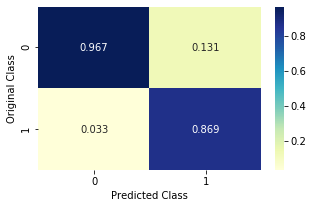

-------------------- Recall matrix (Row sum=1) --------------------


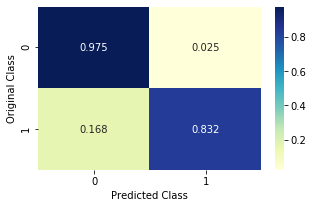

In [92]:
plot_confusion_matrix(y_test,sclf_ohe.predict(final_test_ohe))

# 9 .Feature Selection

### from random forest classifier 

In [95]:
col_name = final_test_res.columns.tolist()
feature_rf_res= rf_res.feature_importances_.tolist()
RF_res_feature = pd.DataFrame(feature_rf_res,col_name)
RF_res_feature = RF_res_feature.sort_values(by =[0])
RF_res_feature

,0
DisChan_2,0.001898
DisChan_1,0.002155
AgencyType_1,0.006003
AgencyType_2,0.008081
Agency_2,0.032573
Agency_1,0.063064
Destination_2,0.069401
Destination_1,0.078319
Product_2,0.090286
Commision (in value),0.095272


#### Removing distribution channel and agency type

### >Response coding new data frame

In [135]:
final_train_res1 = final_train_res.drop(['DisChan_2','DisChan_1','AgencyType_1','AgencyType_2'],1)
final_test_res1 = final_test_res.drop(['DisChan_2','DisChan_1','AgencyType_1','AgencyType_2'],1)

In [136]:
final_train_res1.head()

,Agency_1,Agency_2,Product_1,Product_2,Destination_1,Destination_2,Duration,Net Sales,Commision (in value),Age
0,0.876361,0.123639,0.876361,0.123639,0.848894,0.151106,1.530617,-0.987260,1.560221,2.095206
1,0.927551,0.072449,0.860095,0.139905,0.886291,0.113709,0.369149,1.861500,0.000000,2.600946
2,0.927551,0.072449,0.860095,0.139905,0.964856,0.035144,0.702283,0.448754,0.000000,2.600946
3,0.942660,0.057340,0.936801,0.063199,0.848894,0.151106,0.801323,0.664821,0.612882,4.840649
4,0.510983,0.489017,0.514687,0.485313,0.625154,0.374846,0.135054,0.380321,0.250653,2.095206


## Random forest with new features

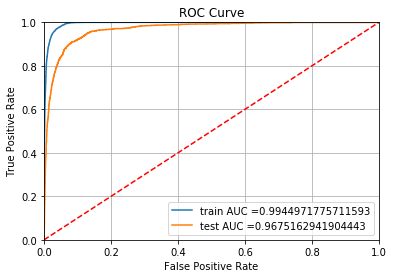

-------------------- Confusion matrix --------------------


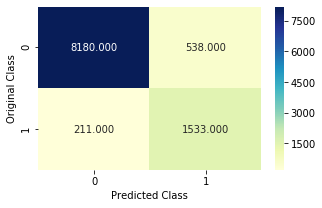

-------------------- Precision matrix (Columm Sum=1) --------------------


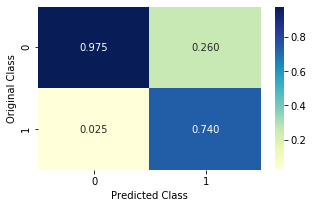

-------------------- Recall matrix (Row sum=1) --------------------


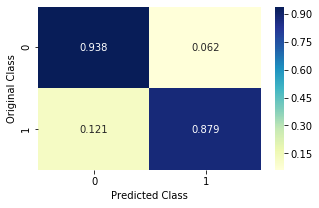

In [137]:
rf_res_new= final_RF(final_train_res1,y_train, final_test_res1, y_test,170,200)
plot_confusion_matrix(y_test,rf_res_new.predict(final_test_res1))

### > OHE new dataframe

In [58]:
new_Xtrain = train_df.iloc[::,[1,4,5,6]]
new_Xtest = test_df.iloc[::,[1,4,5,6]]
cols = list(new_Xtrain.columns)
cols

['Agency', 'Product Name', 'Duration', 'Destination']

In [59]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown = 'ignore')
enc.fit(new_Xtrain)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=True)

In [60]:
new_Xtrain = pd.DataFrame(enc.transform(new_Xtrain).toarray())
new_Xtest = pd.DataFrame(enc.transform(new_Xtest).toarray())

In [61]:
final_train_ohe1 = pd.concat([new_Xtrain,scale_train],1)
final_test_ohe1 = pd.concat([new_Xtest,scale_test],1)
final_train_ohe1

,0,1,2,3,4,5,6,7,8,9,...,560,561,562,563,564,565,Duration,Net Sales,Commision (in value),Age
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.097144,1.647191,2.607130,4.121660
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.017663,0.277053,0.182817,2.892393
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.459228,0.508300,0.335328,3.977040
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.150132,0.658876,1.042852,2.241604
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.008831,0.164719,0.260713,2.241604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.238446,0.715447,0.000000,2.603153
41844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.132470,0.232936,0.000000,2.603153
41845,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.397409,1.601648,1.056285,1.735436
41846,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.114807,0.490830,0.323916,3.904730


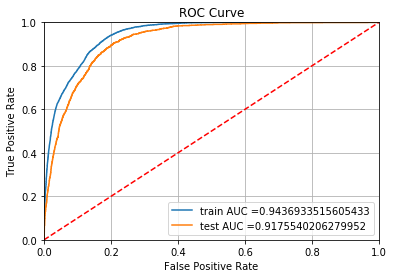

-------------------- Confusion matrix --------------------


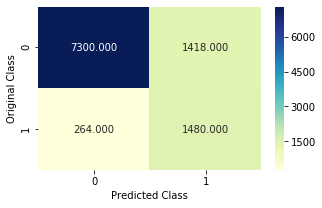

-------------------- Precision matrix (Columm Sum=1) --------------------


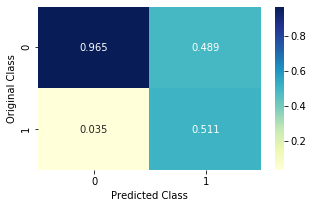

-------------------- Recall matrix (Row sum=1) --------------------


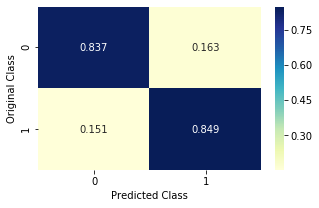

In [64]:
rf_ohe_new= final_RF(final_train_ohe1,y_train, final_test_ohe1, y_test,120,200)
plot_confusion_matrix(y_test,rf_ohe_new.predict(final_test_ohe1))

# > Response coding new dataframe

In [65]:
final_train_res1 = final_train_res.drop(['Agency_2','DisChan_2','AgencyType_2'],1)
final_test_res1 = final_test_res.drop(['Agency_2','DisChan_2','AgencyType_2'],1)
final_train_res1

,Agency_1,AgencyType_1,DisChan_1,Product_1,Product_2,Destination_1,Destination_2,Duration,Net Sales,Commision (in value),Age
0,0.876145,0.908235,0.83258,0.876145,0.123855,0.850783,0.149217,0.097144,1.647191,2.607130,4.121660
1,0.510500,0.680808,0.83258,0.511608,0.488392,0.627114,0.372886,0.017663,0.277053,0.182817,2.892393
2,0.510500,0.680808,0.83258,0.568612,0.431388,0.627114,0.372886,0.459228,0.508300,0.335328,3.977040
3,0.876145,0.908235,0.83258,0.876145,0.123855,0.959340,0.040660,0.150132,0.658876,1.042852,2.241604
4,0.876145,0.908235,0.83258,0.876145,0.123855,0.792150,0.207850,0.008831,0.164719,0.260713,2.241604
...,...,...,...,...,...,...,...,...,...,...,...
41843,0.927599,0.908235,0.83258,0.859647,0.140353,0.834606,0.165394,0.238446,0.715447,0.000000,2.603153
41844,0.927599,0.908235,0.83258,0.972638,0.027362,0.917178,0.082822,0.132470,0.232936,0.000000,2.603153
41845,0.510500,0.680808,0.83258,0.511608,0.488392,0.627114,0.372886,0.397409,1.601648,1.056285,1.735436
41846,0.510500,0.680808,0.83258,0.568612,0.431388,0.627114,0.372886,0.114807,0.490830,0.323916,3.904730


# Xgboost with new features

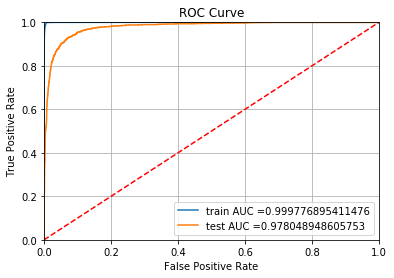

-------------------- Confusion matrix --------------------


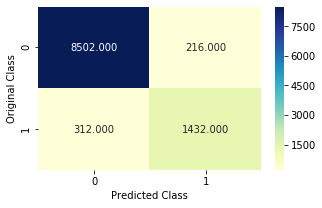

-------------------- Precision matrix (Columm Sum=1) --------------------


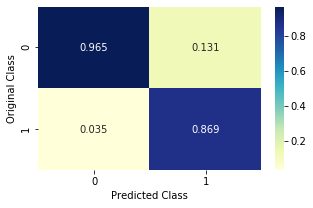

-------------------- Recall matrix (Row sum=1) --------------------


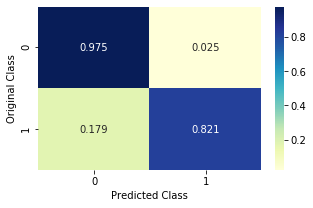

In [142]:
xg_res_new= final_GBDT(final_train_res1,y_train, final_test_res1, y_test,170,200)
plot_confusion_matrix(y_test,xg_res_new.predict(final_test_res1))

# Stacking new random forest and xgbost

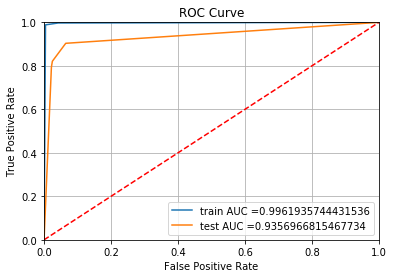

Wall time: 54.1 s


In [143]:
%%time
from mlxtend.classifier import StackingClassifier
m_classifier=LogisticRegression(random_state=0)

# Code starts here
sclf = StackingClassifier(classifiers = [xg_res_new,rf_res_new], meta_classifier=m_classifier)
sclf.fit(final_train_res1,y_train)
train_fpr, train_tpr, thresholds = roc_curve(y_train, sclf.predict_proba(final_train_res1)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, sclf.predict_proba(final_test_res1)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.grid(True)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

-------------------- Confusion matrix --------------------


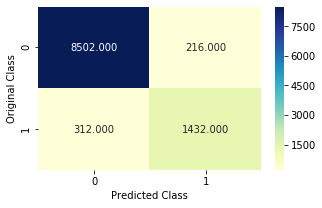

-------------------- Precision matrix (Columm Sum=1) --------------------


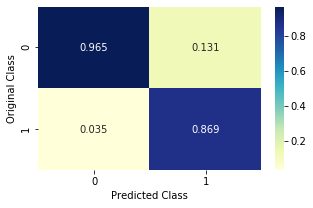

-------------------- Recall matrix (Row sum=1) --------------------


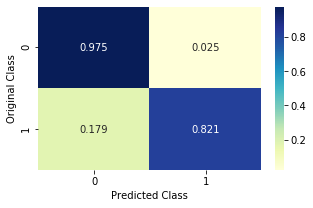

In [144]:
plot_confusion_matrix(y_test,sclf.predict(final_test_res1))

# Final Model with xgboost on Response Coding and One Hot Encoding

In [66]:
%%time
from xgboost import XGBClassifier
ohe_xg = XGBClassifier(booster='gbtree', n_estimators=150 , max_depth=200)
ohe_xg.fit(final_train_ohe1,y_train, sample_weight = w_array)

Wall time: 15min 46s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=200,
              min_child_weight=1, missing=None, n_estimators=150, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

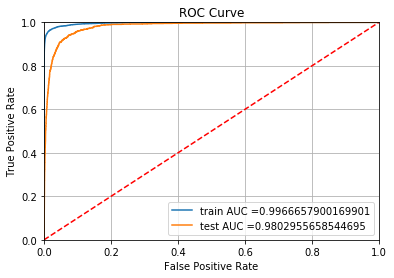

In [47]:
train_fpr, train_tpr, thresholds = roc_curve(y_train, ohe_xg.predict_proba(final_train_ohe1)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, ohe_xg.predict_proba(final_test_ohe1)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.grid(True)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

-------------------- Confusion matrix --------------------


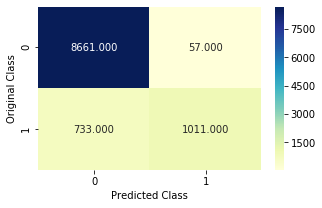

-------------------- Precision matrix (Columm Sum=1) --------------------


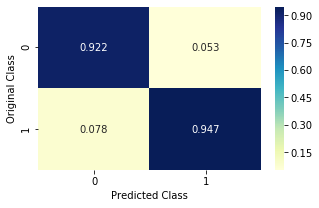

-------------------- Recall matrix (Row sum=1) --------------------


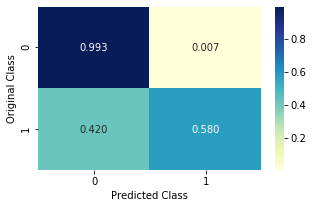

In [68]:
plot_confusion_matrix(y_test,ohe_xg.predict(final_test_ohe1))

In [45]:
%%time
from xgboost import XGBClassifier
res_xg = XGBClassifier(booster='gbtree', n_estimators=170 , max_depth=200)
res_xg.fit(final_train_res1,y_train, sample_weight = w_array)

Wall time: 32 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=200,
              min_child_weight=1, missing=None, n_estimators=170, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

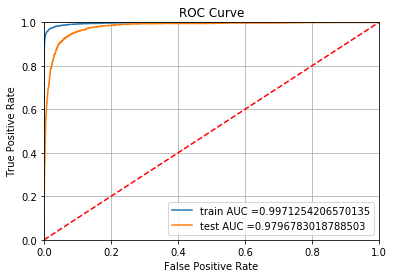

In [48]:
train_fpr, train_tpr, thresholds = roc_curve(y_train, res_xg.predict_proba(final_train_res1)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, res_xg.predict_proba(final_test_res1)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.grid(True)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

-------------------- Confusion matrix --------------------


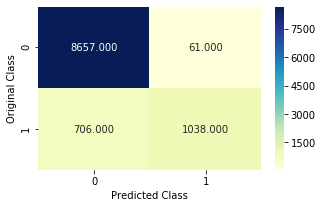

-------------------- Precision matrix (Columm Sum=1) --------------------


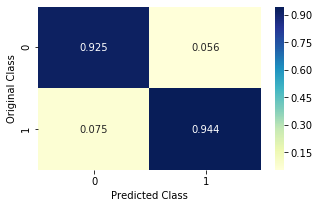

-------------------- Recall matrix (Row sum=1) --------------------


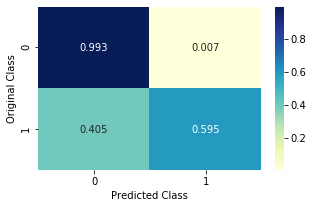

In [46]:
plot_confusion_matrix(y_test,res_xg.predict(final_test_res1))

In [85]:
# Creating table using PrettyTable library
from prettytable import PrettyTable
Model = ['Xgboost', 'Xgboost']
AUC = [0.98,0.97]
Encoding = ['Response', 'OHE']
hyperparameter1= [200,200]
hyperparameter2= [150,170]
precision = [94.7,94.4]
# Initializing prettytable
ptable = PrettyTable()
# Adding columns
ptable.add_column("Model"   ,   Model)
ptable.add_column(" Best depth ",hyperparameter1)
ptable.add_column("n models ",hyperparameter2)
ptable.add_column("Test AUC",AUC)
ptable.add_column("Precision",precision)
# Printing the Table
print(ptable)

+---------+--------------+-----------+----------+-----------+
|  Model  |  Best depth  | n models  | Test AUC | Precision |
+---------+--------------+-----------+----------+-----------+
| Xgboost |     200      |    150    |   0.98   |    94.7   |
| Xgboost |     200      |    170    |   0.97   |    94.4   |
+---------+--------------+-----------+----------+-----------+


# Conclusion
One hot encoding proved better than response coding in terms of precision score but it was only by 0.10 percent.

Response coding was predicting using only 10 features while OHE used 142 features so time and space complexity of response coding is far much better than ohe.

So for better precision we can use OHE and for better time space complexity we can use response coding according to business requirement.


# ===========================END==============================